In [99]:
import pandas as pd
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [100]:
df = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

In [101]:
df['target'] = load_iris().target
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
145       2  
146       2  
147       2  
148       2  
149       2  

[150 rows x 5 columns]

In [102]:
df['flower'] = df['target'].apply(lambda x: load_iris().target_names[x])
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target     flower  
0         0     setosa  
1         0     setosa  
2         0     setosa  
3         0     setosa  
4         0     setosa  
..      ...        ...  
145       2  virginica  
146       2  virginica  
147       2  virginica  
148       2  virginica  
149       2  virginica  

[150 rows x 6 columns]

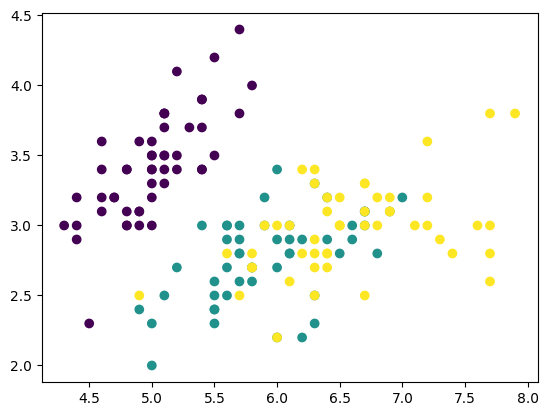

In [103]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['target'], cmap='viridis')

In [104]:
X = df.drop(columns=['target','flower'])
X.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [105]:
y = df['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [106]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [107]:
svm_model = SVC()

In [108]:
svm_model.fit(x_train, y_train)

SVC()

In [110]:
svm_model.score(x_test, y_test)

0.9555555555555556

In [111]:
y_pred = svm_model.predict(x_test)

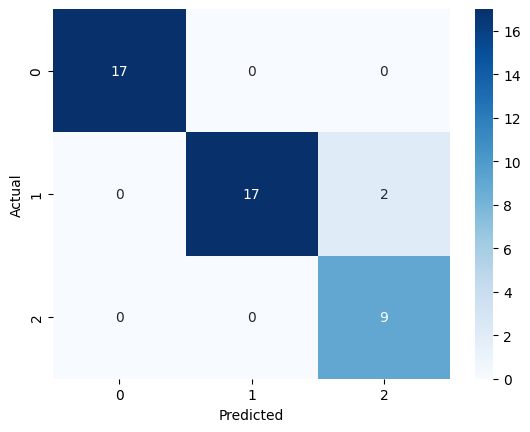

In [113]:
import seaborn as sns

conf_mat = pd.crosstab(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [114]:
cm = pd.crosstab(y_test, y_pred)

In [115]:
cm

col_0    0   1  2
target           
0       17   0  0
1        0  17  2
2        0   0  9